## Assignment #2
### Dhruv Meena, 22b1279
Drive Link: https://drive.google.com/drive/folders/1kl9MvdI9v53W3nr2nWzgiuCRMGQ9wdJ3?usp=sharing

In [2]:
# First let's import the libraries we need for this assignment...
import numpy as np # we need this to do maths
import matplotlib.pyplot as plt # we always need this for plots
import pandas as pd # to create dataframes and work with them easily
import seaborn as sns # to create beautiful looking plots
import time # we need this for question 3

### Question 1
For the first question we need to write a function which generates a $N \times D$ data matrix for regression.
- The input to this function is the sample size $N$ and also a generator matrix $\mathbf{S}$ of size $M \times D$.
- To get the output matrix we need to multiply a $N \times M$ matrix to the generator matrix $\mathbf{S}$.
- What this function does is generate a random 2D array where each column has a standard gaussian distribution and is independent of other columns. This then gets multiplied with $\mathbf{S}$ to give the output $\mathbf{X}$.

$$
\mathbf{A_{\small N \times M}}⋅\mathbf{S_{\small M \times D}} = \mathbf{X_{\small N \times D}}
$$

Where $\mathbf{A}$ is the matrix the function generates.

In [3]:
def generate_data(N, S): # we take in N and S as the arguments

    # we need to figure out what M is, so we can use shape function in python to get the dimensions of it.
    # Given S is M x D matrix, its shape will be (M,D) and so S.shape[0] is M
    M = S.shape[0]

    # [1][2] we can use randn to generate the random numbers with a gaussian distribution. This is a standard gaussiana and columns are independent from each other.
    A = np.random.randn(N, M)

    # [3] X is the dot product of A and S now
    X = np.dot(A, S)
    return X

In [ ]:
# Let's test our function!
S_test_1 = [ # identity matrix
    [1,0,0],
    [0,1,0],
    [0,0,1]
]
S_test_a_1 = np.array(S_test_1) # we do this because list does not have the shape attribute so we must convert it into an array.

generate_data(5,S_test_a_1) # call our function

array([[ 0.54908778,  0.84474039,  2.02579316],
       [-1.28871124, -1.41342292,  0.48766385],
       [-0.63696328,  0.09196846, -1.63813597],
       [ 0.47678402, -0.75096379,  1.52217038],
       [ 1.74252132, -0.11494093, -0.10385816]])

Our function works! We can clearly see that it is a 5x3 matrix and our input N was 5 while D is 3.

### Question 2
Similar to question 1, we again generate a matrix but now its the target vector $\mathbf{t}$ of size $N \times 1$.
- The input here is the data matrix we generated in question one, $\mathbf{X}$. We also need to give in a weight vector $\mathbf{w}$ of size $D \times 1$ and noise variance $\sigma$.
- The function first checks dimension mismatch between the weight vector and data matrix, if none is found, it multiplies them, adds bias then adds zero mean gaussian noise of variance $\sigma$.

In [4]:
def generate_target(X, w, variance):
  # let's check for dimensional mismatch. We need X to be a NxD and w to be Dx1.
  # We add a +1 after X.shape[1] because the shape of w is D+1 before the bias is extracted.
  if X.shape[1]+1 != w.shape[0]:
    print("Dimensional Mismatch!")
    return
  else:
    N = X.shape[0] # if we need N later
    bias = w[-1] # [4] the excluded element at the end
    w = w[0:-1] # [4] we can use list slicing to update our w to be without the bias element

    # Mutiply them
    t = np.dot(X,w)

    # Add bias
    t = t + bias

    # [17] let's create gaussian nosie
    noise = np.random.normal(loc=0, scale=np.sqrt(variance), size=t.shape) # 0 mean, sqrt(variance) = standard deviation

    # Add noise
    t = t + noise
  return t

In [ ]:
# Let's test
X_2 = generate_data(3,S_test_a_1)
w_2_t = [
    [1],
    [0],
    [3],
    [7]
]
w_2 = np.array(w_2_t)
generate_target(X_2,w_2,0.25).shape

(3, 1)

The function seems to be working fine, we got a Nx1 matrix as output.

### Question 3
We are trying to analyze the time taken by numpy.linalg.pinv to compute the pseudo inverse of the data matrix and plotting it against sample size N while keeping D=10 constant.

The data matrix is $N \times 10$ in this case and $N$ will vary from, say, 10 to 1e6.

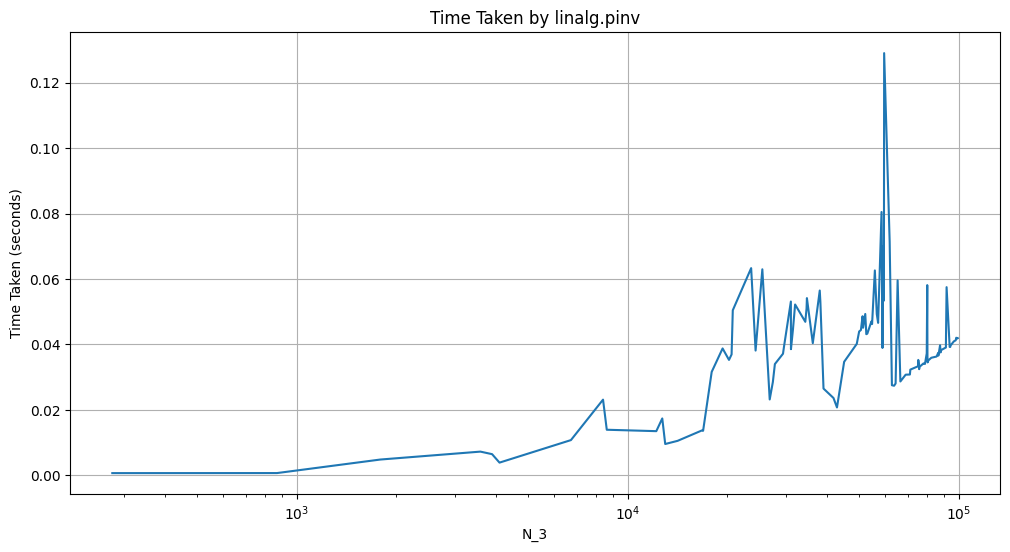

In [ ]:
# [5] We will need a new S matrix because D = 10, let's have it be the identitiy matrix
S_3 = np.identity(10)

# empty list where we will append time taken by the algorithm
times = []

# [6] randomly generate N values from 1 to 1e5, 50 such numbers and the data type is obviously integers, uint32 because we are doing 100k, uint8 uint16 would be out of bounds
N_3 = np.sort(np.random.randint(1,100000,size=100,dtype=np.uint64))

for i in range(len(N_3)):
  # [9] first generate X, start time, run the algorithm, stop time, append time taken
  X_3 = generate_data(N_3[i], S_3)
  try:

    start_time = time.time()
    pinv = np.linalg.pinv(X_3)
    time_taken = time.time() - start_time

    times.append(time_taken) # append the time taken, it actually appends in correct order so we don't need to worry

  except Exception as e:
        # [9][8] LinAlgError is raised If the SVD computation does not converge so we need to have error handling
        print(f"Failed to converge. N={i}: {e}")

        times.append(np.nan) # appending nan values as time

# We have the times, now all we have to do is plot them in the log scales
plt.figure(figsize=(12, 6))
plt.plot(N_3, times)

# [7] [20] We need to convert the scales
plt.xscale('log')
plt.yscale('linear')

plt.xlabel('N_3')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Taken by linalg.pinv')
plt.grid(True)
plt.show()

### Conclusions from the graph
- N values up to order 3 show a pretty constant time taken to compute pinv and it steadily rises, afterwards. Somewhere between N value of 9-10k it crosses 0.02 seconds and beyond this point we see strange behaviour.
- The strange behaviour is seen around N value of 10000 onwards and beyond which the time taken increases non-linearly and sort of oscillates a lot. In this region, N values, say, N' and N'' with time taken t' and t'' respectively may satisfy,

$$ N' < N'' \hspace{1cm} t' > t''$$

- Reasons for this could be memory issues or precision errors due to large N values.

### Question 4 [10]
We are to write a function to calculate the NRMSE between a target vector $\mathbf{t}$ and a predicted vector $\mathbf{y}$.
- $\mathbf{t}$ is a $N \times 1$ matrix and so is $\mathbf{y}$ so we can find the NRMSE for each element in these column vectors.
- NRMSE = $\frac{\Sigma (S_i - O_i)^2}{\Sigma O_i^2}$, where $O_i$ are observed values, and $S_i$ are simulated values. In our case $\mathbf{y}$ are the predicted values while $\mathbf{t}$ are observed values.

In [5]:
def NRMSE(t,y):
  # extract n
  N = t.shape[0]
  sum1 = 0.0000
  sum2 = 0.0000
  # [10] run the loop where you sum it all up, we will run two sums and then divide their results
  for i in range(N):
    sum1 += (y[i]-t[i])**2
    sum2 += t[i]**2
    NRMSE = sum1/sum2
  return NRMSE

### Question 5 [11][12]

- Mean squared error, MSE is defined as,

$$\frac{1}{N}\sum_{i = 1}^{N}(Y_i - \hat Y_i)^2$$

Here, $Y_i$ is the actual value of the observation. $\hat Y_i$ is the predicted value.
- The gradient of MSE is given by,

$$
grad(MSE) = \frac{2}{n} \Sigma (Y_i - \hat Y_i) \cdot x_i
$$

In [6]:
def mse(y,y_hat):

  # [11] using the mse formula we find mse
  sum_5 = np.sum((y-y_hat)**2)
  mse = sum_5/len(y)
  return mse

def grad_mse(y,y_hat,x):

  # [12] gradient of the mse, x is NxD while y-y_haat is Nx1, we do transpose to get a DxN matrix which is multiplied with a Nx1 to give a Dx1 matrix.
  grad_mse = 2 * np.dot(x.T, (y_hat - y)) / len(y)
  # we return the entire Dx1 matrix which contains the gradients with respect to each weight.
  return grad_mse

### Question 6
L2 Regularization and its gradient formula with respect to weights is given as,

$$
L2 = ∑_{i=0}^N |W_i|^2
$$

$$
\frac{dL2}{dW_i} = 2 \times W_i
$$

In [7]:
def l2(w):
  w = w[:-1]
  l2 = np.sum(np.abs(w)**2)
  return l2

def grad_l2(w): # [13]
  return 2*w[:-1] # we have to remove the bias

### Question 7

L1 Regularization and its gradient formula with respect to weights is given as,

$$
L1 = ∑_{i=0}^N |W_i|
$$

$$
\frac{dL1}{dW_i} = \frac{W_i}{|W_i|}
$$

In [8]:
def l1(w):
  w = w[:-1]
  l1 = np.sum(np.abs(w))
  return l1

def grad_l1(w): # [13]
  return np.sign(w[:-1]) # it simplifies down to just the sign of the weight that is why we just do np.sign()

### Question 8

We want to perform gradient descent on MSE + $\lambda_1$L1 + $\lambda_2$L2. We can use the functions we wrote before to find the gradients and keep subtracting from the original sum. I will first print out the difference for a bunch of iterations and then decide on a stopping criteria.


In [9]:
def grad_descent_mse(y,x,w,lambda1,lambda2,iter,alpha):
  for i in range(iter):
        # first just extract your bias and update the weights to be used in calculation of y_hat
        bias = w[-1]  # extract bias
        w_ = w[:-1]   # update weights

        # get y_hat
        y_hat = np.dot(x, w_) + bias

        # [14][12] Bias gradient
        grad_bias = 2 * np.sum(y_hat - y) / y.shape[0]

        # locally doing this because it helped in testing, works the same way if you call grad_l1() or grad_l2() here
        grad_l1_w = np.sign(w_)
        grad_l2_w = 2 * w_

        # gradient without bias
        grad = grad_mse(y,y_hat,x) + lambda1 * grad_l1_w + lambda2 * grad_l2_w

        # [15] stack weight gradient and bias gradient using np.vstack()
        grad_with_bias = np.append(grad, grad_bias)

        # update the weights
        w = w - alpha * grad_with_bias

        # [14] We used a stopping criteria here which is basically breaking the loop if the norm of the gradient is very small, meaning there is no significant changes happening now
        if np.linalg.norm(grad_with_bias) < 1e-5:
            break
  return w

In [ ]:
# Let's test the gradient descent
S_8 = np.identity(3) # defining S vector
w_8 = np.array([[1], [4], [2], [9]])  # Target weights
w_t = np.array([[1], [5], [6], [3]])  # Initial weights

# now we generate the data matrix and also calculate the output vector
X_8 = generate_data(100,S_8)
Y_8 = np.dot(X_8, w_8[:-1]) + w_8[-1]

# we are testing with very small lambda values and a learning rate of 0.001, we run 1000 iterations but we also have a stopping criteria
w_final = grad_descent_mse(Y_8, X_8, w_t, lambda1=0.001, lambda2=0.001, iter=1000, alpha=0.001)

Y_final = np.dot(X_8, w_final[:-1]) + w_final[-1] # calculate the output matrix with the weights after gradient descent so you can calculate NRMSE

# printing weights as well as NRMSE. A very low (<0.01) NRMSE is good
print(f"w_final:{w_final}, nrmse:{NRMSE(Y_8,Y_final)}")

w_final:[[0.8240515 ]
 [3.95809579]
 [2.50982983]
 [8.09483623]], nrmse:[0.00977928]


We got a very low NRMSE and the final weights are very close to the target weights. This means that the gradient descent function works as intended.

### Question 9

We will change the variance which will in turn change the amount of gaussian noise in the output matrix. We will plot average NRMSE versus $\sigma$ here.
- We have to run gradient descent 5 times for each $\sigma$ and then average the NRMSE values.
- We will also have to split the matrices into training and validation sub-matrices and sub-vectors and run gradient descent on them separately. We will be plotting NRMSE vs $\sigma$ on the validation subset.

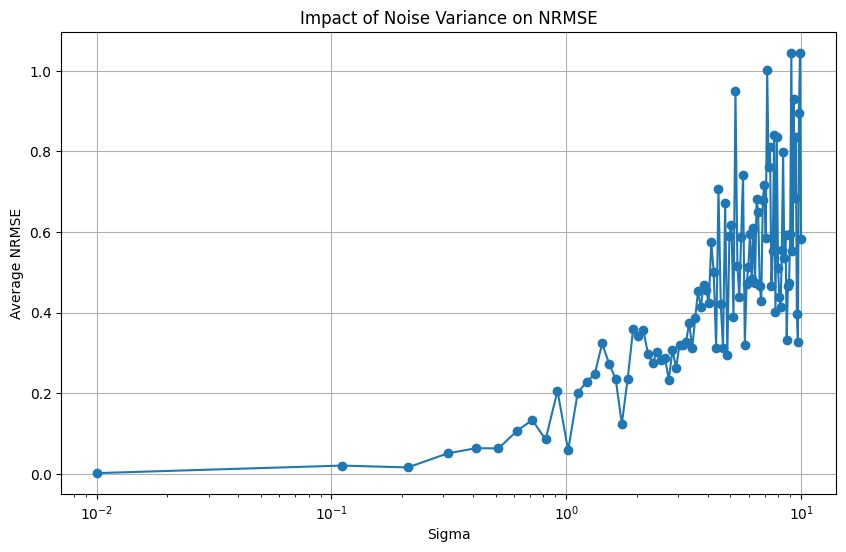

In [ ]:
# let's generate the data matrix. This time we will have a 10x10 S identity matrix, therefore X will be 100x10
S_9 = np.identity(10)
X_9 = generate_data(100,S_9)

# [20] a bunch of sigmas
sigmas = np.linspace(0.01, 10, 100)

w_9 = np.random.randn(11) # targeted weights

# we will store the NRMSE values here
NRMSE_values = []

# Loop over each noise variance value
for s in sigmas:

    # generating the output for the current sigma
    y_9 = generate_target(X_9, w_9, s)

    # [16] split the data into training (75%) and testing (25%)
    train_X = X_9[:75]
    train_y = y_9[:75]
    test_X = X_9[75:]
    test_y = y_9[75:]

    nrmse_sum = 0

    # now we go 5 runs
    for i in range(5):

        # [16] Re-initialize weights for each run
        w_0 = np.random.randn(11)

        # gradient descent being performed, low lambda values, 1000 iters, lr of 0.01
        w_f = grad_descent_mse(train_y, train_X, w_0, 0.001, 0.001, 1000, 0.01)

        # now we find the output with the weights from gradient descent to compare it with our target using NRMSE
        bias = w_f[-1]

        # calculate y for the test set
        Y = np.dot(test_X, w_f[:-1]) + bias

        # add it to the sum
        nrmse_sum += NRMSE(test_y, Y)

    # append the average to the list
    nrmse_sum = nrmse_sum/5
    NRMSE_values.append(nrmse_sum)

# [16] [20] Plot the results showing the impact of noise variance on NRMSE
plt.figure(figsize=(10, 6))
plt.plot(sigmas, NRMSE_values, marker='o')
plt.xscale('log') # it looks way better in a log scale, much more clearer
plt.yscale('linear')
plt.xlabel('Sigma')
plt.ylabel('Average NRMSE')
plt.title('Impact of Noise Variance on NRMSE')
plt.grid(True)
plt.show()

Results:
- We see an increase in the average NRMSE versus the sigma values overall. Initially it is constant, up to sigma value of 0.2 after which it rises and osicillates violently.

### Question 10

We have already seen the impact of variance on NRMSE, now we will observe the impact of N and $\lambda_2$ on NRMSE.
- We will have 5 values of each: N and $\lambda_2$, a total of 25 pairs
- We will again average for 5 runs on each pair
- $\mathbf{S}$ and $\sigma$ are fixed this time

100 0 0.12871220139162132
100 0 0.12812625910951364
100 1 0.19851680787877263
100 10 0.6717639031069202
100 100 0.8872434733488497
316 0 0.11530124964602007
316 0 0.11519326017162504
316 1 0.23921587683954906
316 10 0.709839095429728
316 100 0.928918657888997
1000 0 0.07439720243604034
1000 0 0.08228017542034606
1000 1 0.2679138512253177
1000 10 0.7210844332218954
1000 100 0.8153679191193888
3162 0 0.07711879120885778
3162 0 0.06482537453631163
3162 1 0.2336578366654897
3162 10 0.7449041477282238
3162 100 0.8266746923610102
10000 0 0.07245948694882474
10000 0 0.10336767214928096
10000 1 0.2604803845688936
10000 10 0.7166015378641981
10000 100 0.832078579015168


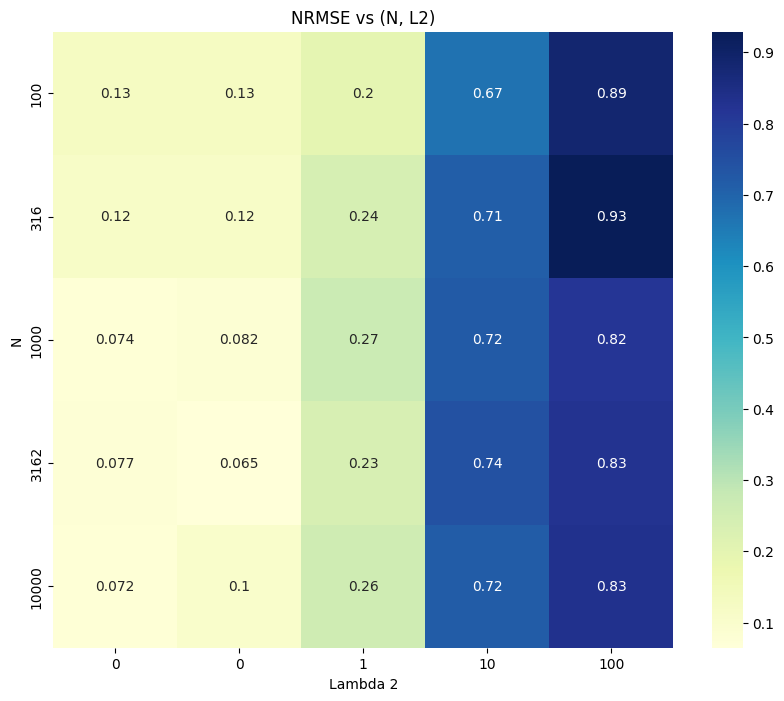

In [ ]:
# [18]
w_10 = np.random.randn(11) # target weights

# [19] N values ranging from 10 to 100000
N_values = np.logspace(2, 4, num=5, dtype=int)

# lambda_2 values ranging from 1e-3 to 10
lambda2_values = np.logspace(-2, 2, num=5, dtype=int)

NRMSE_values = []

# we loop over each N first and the inside we loop over the lambda
for N in N_values:
    nrmse_N = []  # Initialize list to store NRMSE for current N
    # Loop over each value of lambda_2
    for lambda_2 in lambda2_values:

        # generating data matrix
        X_10 = generate_data(N, np.identity(10))

        # we generate the target using true weights, we will keep the variance fixed at 0.5
        Y_10 = generate_target(X_10, w_10, variance=0.5)

        # [16] Split the data into training (80%) and testing (20%) sets
        split_index = int(0.8 * N)
        train_X = X_10[:split_index]
        train_y = Y_10[:split_index]
        test_X = X_10[split_index:]
        test_y = Y_10[split_index:]

        nrmse_gd = 0  # this sums the nrmse values in the inner loop, gets appended to nrmse_N as the average of 5 runs

        # now we perform descent
        for i in range(5):
            # our random weights are generated, there is no particular reason to choose a gaussian distribution but we are sure that the columns are independent this way
            w_0 = np.random.randn(11)

            # call the descent function,
            w_gd = grad_descent_mse(train_y, train_X, w_0, 0, lambda_2, 1000, 0.001)

            # now we just compute the Y matrix from the weights we got from gradient descent
            bias = w_gd[-1]
            Y = np.dot(test_X, w_gd[:-1]) + bias

            # run NRMSE on it and add it to our inner sum
            nrmse_gd += NRMSE(test_y, Y)

        # average and append
        nrmse_gd = nrmse_gd / 5
        print(N, lambda_2, nrmse_gd) # to see our progres
        nrmse_N.append(nrmse_gd)

    # Append the NRMSE values for this N to the overall results
    NRMSE_values.append(nrmse_N)

# Convert the NRMSE values to a numpy array for easier handling
NRMSE_values = np.array(NRMSE_values)

# [16] Plotting the heatmap to visualize the results
plt.figure(figsize=(10, 8))
sns.heatmap(NRMSE_values, annot=True, xticklabels=lambda2_values, yticklabels=N_values, cmap="YlGnBu")

# [16] Label the axes and the plot
plt.xlabel("Lambda 2")
plt.ylabel("N")
plt.title("NRMSE vs (N, L2)")
plt.show()

Heatmap conclusions:
- Clearly as $\lambda_2$ increases we see a marked increase in NRMSE. Low values are good.
- As N is increasing we see a decrease in NRMSE.
- There are many exceptions that we can see in the heatmap but the above two points hold in general.

### Question 11

In this part we will observe the impact of $\lambda_1$ on variable elimination. And also the effect of introducing correlations in the data matrix columns. We shall plot the weights vs $\frac{1}{\lambda_1}$

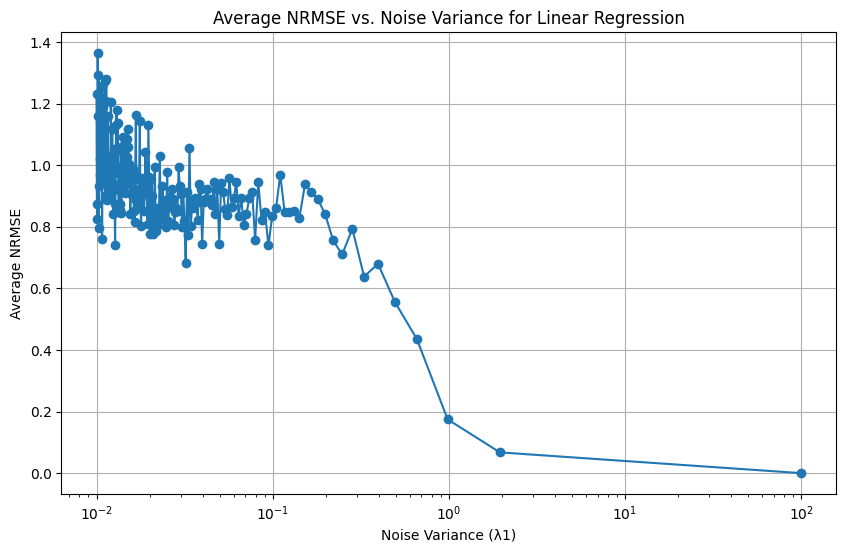

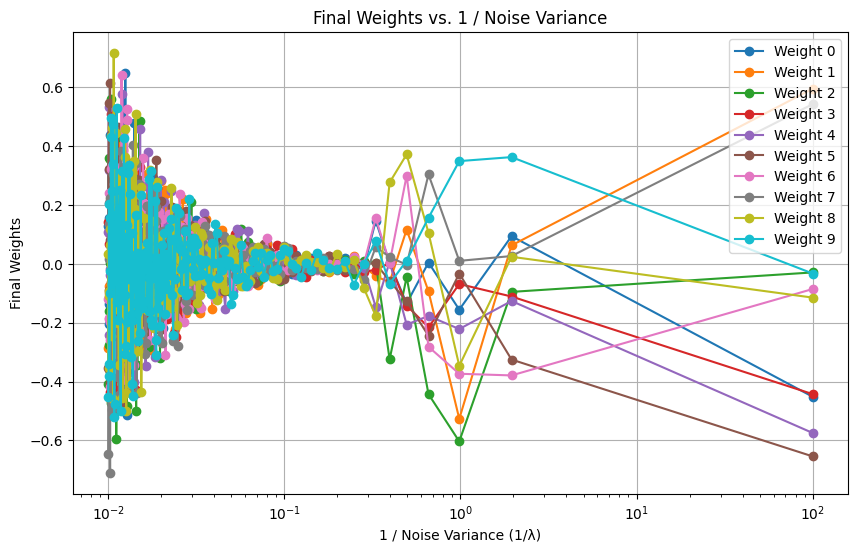

In [316]:
# [20] lambda 1 values
lambda1 = np.linspace(0.01, 100, 200)

# list for nrmse values
nrmse_vals = []
final_weights = np.zeros((len(lambda1), 11))  # [20] Array to store average weights for each lambda1

for idx, l in enumerate(lambda1): # [20] helps iterate over lambda values in lambda1 while doing a separate iteration for idx

    nrmse_results = []  # append inner sums

    for _ in range(5):  # Run the experiment multiple times for averaging

        # generate the data matrix
        X_11 = generate_data(100, np.identity(10))

        w_11 = np.random.randn(11)  # initialize weights each run
        y_11 = generate_target(X_11, w_11, 0)  # we will just take 0.25 variance and generate our target matrix

        split_index = int(0.75 * N)  # [20] Split index for training and validation
        X_train, X_val = X_11[:split_index], X_11[split_index:]
        y_train, y_val = y_11[:split_index], y_11[split_index:]

        w_gd = grad_descent_mse(y_train, X_train, w_11, l, 0, 1000, 0.01)  # l2 as 0 and learning rate as 0.01
        final_weights[idx] += w_gd  # Accumulate the learned weights for averaging
        y_hat_11 = np.dot(X_11,w_gd[:-1]) + w_gd[-1]  # we make the output using new gradient descent weights
        nrmse_val = NRMSE(y_11, y_hat_11)
        nrmse_results.append(nrmse_val)

    nrmse_vals.append(np.mean(nrmse_results))  # need to average it for 5 runs
    final_weights[idx] /= 5  # [20] Average the final weights across runs

# [20] Plotting the results for average NRMSE
plt.figure(figsize=(10, 6))
plt.plot(1/lambda1, nrmse_vals, marker='o')
plt.xscale('log')
plt.yscale('linear')
plt.xlabel('Noise Variance (λ1)')
plt.ylabel('Average NRMSE')
plt.title('Average NRMSE vs. Noise Variance for Linear Regression')
plt.grid()
plt.show()

# Plotting final weights vs 1/lambda1
plt.figure(figsize=(10, 6))
reciprocal_lambda1 = 1 / lambda1

# [20] plotting each weight against 1/l1
for i in range(10):  # Iterate over each weight
    plt.plot(reciprocal_lambda1, final_weights[:, i], marker='o', label=f'Weight {i}')  # Plot weight vs. 1/lambda1

plt.xlabel('1 / Noise Variance (1/λ)')
plt.ylabel('Final Weights')
plt.title('Final Weights vs. 1 / Noise Variance')
plt.grid()
plt.legend()
plt.xscale('log')
plt.show()


Conclusions drawn:
- An increase in $\lambda_1$ results in a decrease in average NRMSE values. Goes very close to zero at values just beyond 100.
- Final weights seem to converge around $10^{-1}$ and on further increase they diverge and seemingly settle down to an almost constant value.

### Adding correlation to Q11



<Axes: >

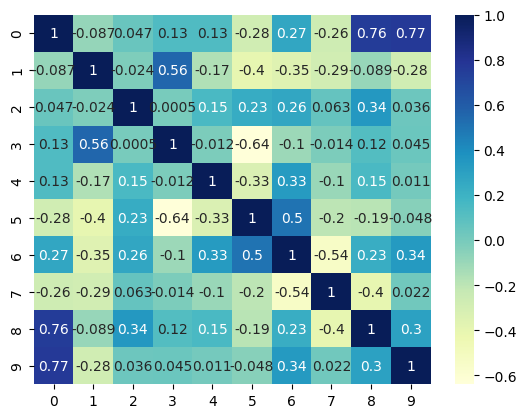

In [11]:
S_11 = np.random.randn(10, 10) # [21] correlated matrix

correlation_matrix = np.corrcoef(S_11, rowvar=False) # [21]
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

This heatmap shows that the off-diagonal elements are all non-zero which means that there is no independent columns. We can use this next.

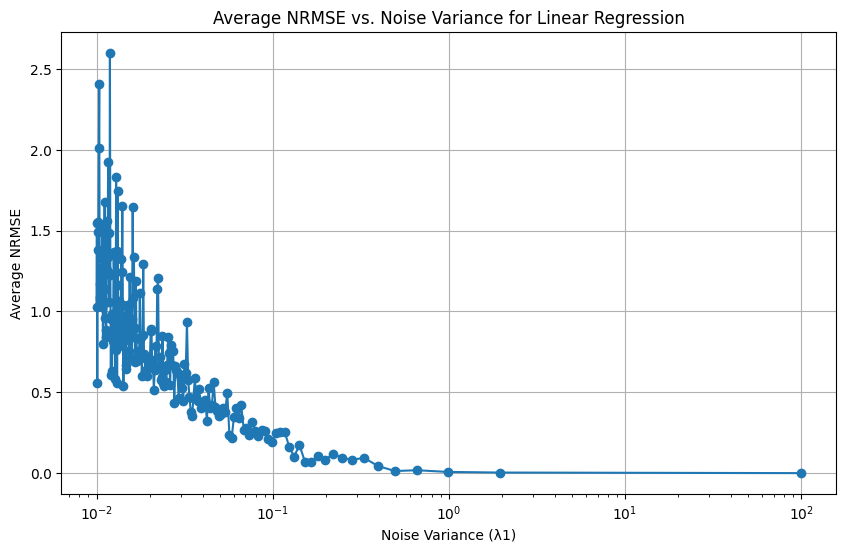

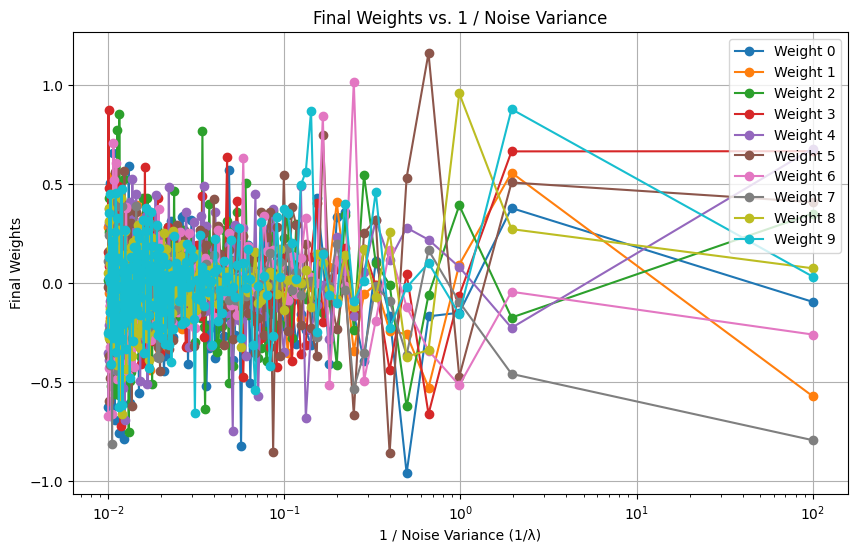

In [320]:
# [20] lambda 1 values
lambda1 = np.linspace(0.01, 100, 200)

# list for nrmse values
nrmse_vals = []
final_weights = np.zeros((len(lambda1), 11))  # [20] Array to store average weights for each lambda1

for idx, l in enumerate(lambda1): # [20] helps iterate over lambda values in lambda1 while doing a separate iteration for idx

    nrmse_results = []  # append inner sums

    for _ in range(5):  # Run the experiment multiple times for averaging

        # generate the data matrix
        X_11 = generate_data(100, S_11)

        w_11 = np.random.randn(11)  # initialize weights each run
        y_11 = generate_target(X_11, w_11, 0)  # we will just take 0.25 variance and generate our target matrix

        split_index = int(0.75 * N)  # [20] Split index for training and validation
        X_train, X_val = X_11[:split_index], X_11[split_index:]
        y_train, y_val = y_11[:split_index], y_11[split_index:]

        w_gd = grad_descent_mse(y_train, X_train, w_11, l, 0, 1000, 0.01)  # l2 as 0 and learning rate as 0.01
        final_weights[idx] += w_gd  # Accumulate the learned weights for averaging
        y_hat_11 = np.dot(X_11,w_gd[:-1]) + w_gd[-1]  # we make the output using new gradient descent weights
        nrmse_val = NRMSE(y_11, y_hat_11)
        nrmse_results.append(nrmse_val)

    nrmse_vals.append(np.mean(nrmse_results))  # need to average it for 5 runs
    final_weights[idx] /= 5  # [20] Average the final weights across runs

# [20] Plotting the results for average NRMSE
plt.figure(figsize=(10, 6))
plt.plot(1/lambda1, nrmse_vals, marker='o')
plt.xscale('log')
plt.yscale('linear')
plt.xlabel('Noise Variance (λ1)')
plt.ylabel('Average NRMSE')
plt.title('Average NRMSE vs. Noise Variance for Linear Regression')
plt.grid()
plt.show()

# Plotting final weights vs 1/lambda1
plt.figure(figsize=(10, 6))
reciprocal_lambda1 = 1 / lambda1

# [20] plotting each weight against 1/l1
for i in range(10):  # Iterate over each weight
    plt.plot(reciprocal_lambda1, final_weights[:, i], marker='o', label=f'Weight {i}')  # Plot weight vs. 1/lambda1

plt.xlabel('1 / Noise Variance (1/λ)')
plt.ylabel('Final Weights')
plt.title('Final Weights vs. 1 / Noise Variance')
plt.grid()
plt.legend()
plt.xscale('log')
plt.show()


Conclusion:
- As expected, there is hardly any convergence for when there are correlated columns in the data matrix.

### Question 12

Grouping effect of elastic net on correlated columns of $\mathbf{X}$. Elastic net has both L1 and L2 so we can see the impact of them as follows,

<ipython-input-6-4e4e8672e08b>:11: RuntimeWarning: overflow encountered in multiply
  grad_mse = 2 * np.dot(x.T, (y_hat - y)) / len(y)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


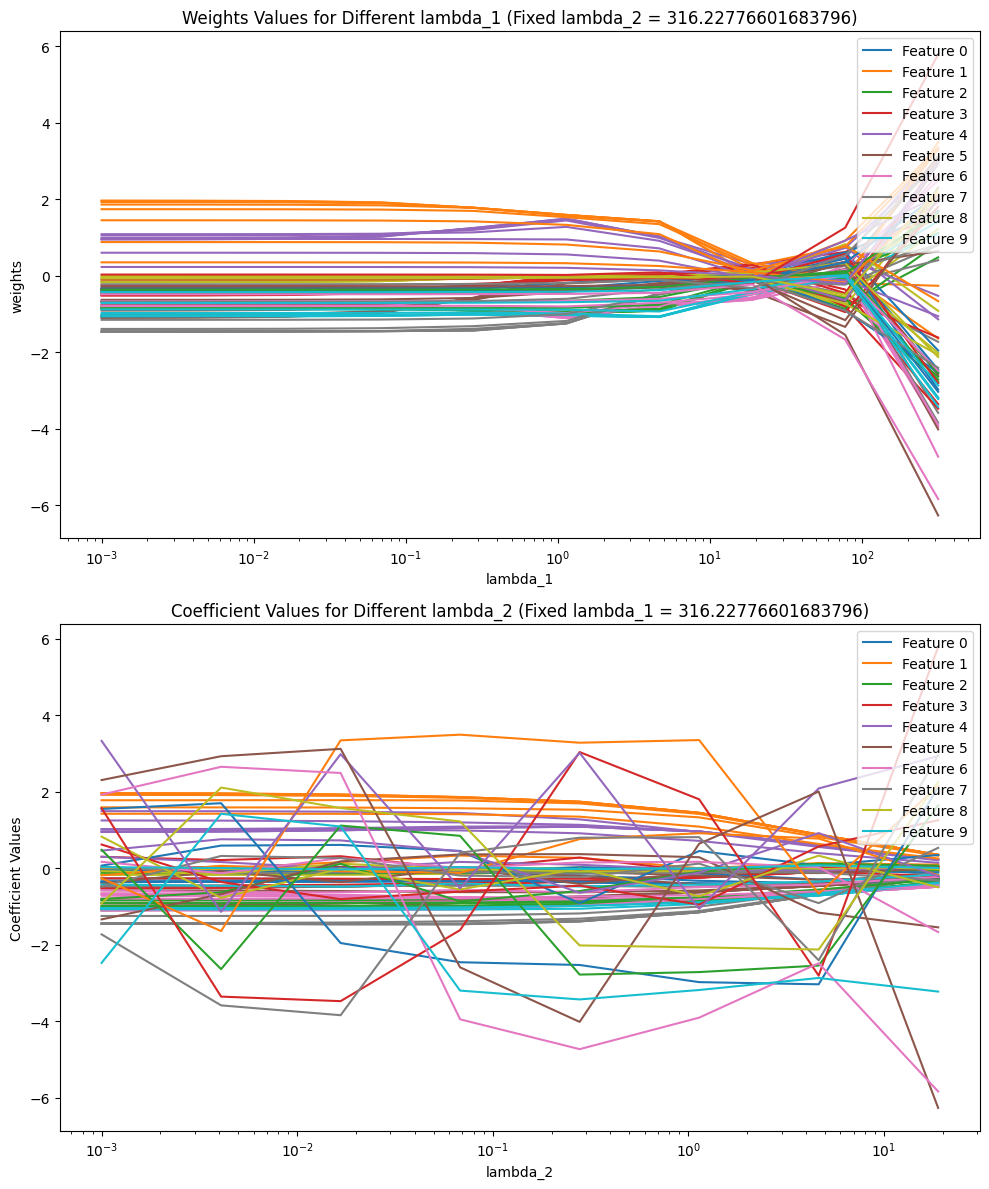

In [22]:
# generate the data matrix using the correlated generator matrix
X_12 = generate_data(100, S_11)

# generate the target vector
w_12 = np.random.randn(11)  # target weights
y_12 = generate_target(X_12, w_12, 0.55)  # random variance of 0.55

# [16] l1 and l2 values
lambda1_values = np.logspace(-3, 2.5, num=10)
lambda2_values = np.logspace(-3, 2.5, num=10)

# Initialize lists to store coefficients and regularization values
lambda1_window = []
lambda2_window = []
weights_window = []

# Iterate over different combinations of lambda_1 and lambda_2
for lambda_1 in lambda1_values:
    for lambda_2 in lambda2_values:
        w_0 = np.random.randn(11)  # generate new weights every turn

        # gd
        w_gd = grad_descent_mse(y_12, X_12, w_0, lambda_1, lambda_2, 10000, 0.01)

        # store the current lambda values and the weights without bias
        lambda1_window.append(lambda_1)
        lambda2_window.append(lambda_2)
        weights_window.append(w_gd[:-1])

# Convert lists to numpy arrays
lambda1_window = np.array(lambda1_window)
lambda2_window = np.array(lambda2_window)
weights_window = np.array(weights_window)

# [22] Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# [16][22] Plot the weights for different lambda_1 values (fixed lambda_2)
for i, lambda_2 in enumerate(lambda2_values):
    indices = np.where(lambda2_window == lambda_2)[0]
    ws = weights_window[indices]
    for j in range(10):
        ax[0].plot(lambda1_values, ws[:, j], label=f'Feature {j}' if i == 0 else "")
    ax[0].set_xscale('log')
    ax[0].set_xlabel('lambda_1')
    ax[0].set_ylabel('weights')
    ax[0].set_title(f'Weights Values for Different lambda_1 (Fixed lambda_2 = {lambda_2})')
    ax[0].legend(loc='upper right')

# [16][22] Plot the coefficients for different lambda_2 values (fixed lambda_1)
for i, lambda_1 in enumerate(lambda1_values):
    indices = np.where(lambda1_window == lambda_1)[0]
    ws = weights_window[indices]
    for j in range(10):
        ax[1].plot(lambda2_values, ws[:, j], label=f'Feature {j}' if i == 0 else "")
    ax[1].set_xscale('log')
    ax[1].set_xlabel('lambda_2')
    ax[1].set_ylabel('Coefficient Values')
    ax[1].set_title(f'Coefficient Values for Different lambda_2 (Fixed lambda_1 = {lambda_1})')
    ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

### Question 13

We need to implement a linear binary classification vector $\mathbf{t}$ with variance $\sigma$.
- For classification we pass it through a sigmoid

$$
sgn(z) = \frac{1}{1 + e^{-z}}
$$

In [24]:
def sigmoid(z): # [23]
    return 1 / (1 + np.exp(-z)) # just as described above,

def generate_binary_class(X, w, variance):

    # generate y first
    y = generate_target(X, w, variance)

    # pass through sigmoid
    y_2 = sigmoid(y)

    # have a threshold to decide the classes
    t = (y_2 > 0.5).astype(int)

    # return the binary target vector
    return t

### Question 14

Computing gradient for binary cross-entropy for logistic regression which is given by,

$$
= -\frac{1}{n} \mathbf{X}^T (\mathbf{y} - sgn(\mathbf{X} \mathbf{w}))
$$

In [25]:
def grad_binary_class(x, y, w): # [24]

    N = x.shape[0]  # sample size extraction

    y = generate_target(x,w,0) # get target to be passed through sgn
    y_2 = sigmoid(y) # pass through sigmoid
    grad = - (1 / N) * np.dot(x.T, (y - y_2)) # we use the formula

    return grad

### Question 15

Repeating Q10 for binary classification

In [28]:
def grad_descent_logistic(y,x,w,lambda1,lambda2,iter,alpha): # the same descent function with minimum changes
  for i in range(iter):
        # first just extract your bias and update the weights to be used in calculation of y_hat
        bias = w[-1]  # extract bias
        w_ = w[:-1]   # update weights

        # get y_hat
        y_hat = generate_binary_class(x,w,0)

        # [14][12] Bias gradient
        grad_bias = 2 * np.sum(y_hat - y) / y.shape[0]

        # locally doing this because it helped in testing, works the same way if you call grad_l1() or grad_l2() here
        grad_l1_w = np.sign(w_)
        grad_l2_w = 2 * w_

        # gradient without bias
        grad = grad_binary_class(x,y,w) + lambda1 * grad_l1_w + lambda2 * grad_l2_w

        # [15] stack weight gradient and bias gradient using np.vstack()
        grad_with_bias = np.append(grad, grad_bias)

        # update the weights
        w = w - alpha * grad_with_bias

        # [14] We used a stopping criteria here which is basically breaking the loop if the norm of the gradient is very small, meaning there is no significant changes happening now
        if np.linalg.norm(grad_with_bias) < 1e-5:
            break
  return w

<ipython-input-5-fcfd8425ab7e>:10: RuntimeWarning: divide by zero encountered in scalar divide
  NRMSE = sum1/sum2


100 0 1.7647329498962212
100 0 1.0489346232715626
100 1 0.9557779601658745
100 10 0.6235044330894995
100 100 0.833394683098818
316 0 1.0980719542273394
316 0 1.5562627829503106
316 1 0.7150793496099097
316 10 0.5683030938973136
316 100 0.8640516456929058
1000 0 1.2670056834082577
1000 0 1.1817069077942841
1000 1 0.6611504966052871
1000 10 0.6952862969092215
1000 100 0.639306867609642
3162 0 1.2283738798303165
3162 0 1.0236656425508772
3162 1 0.9083494180917263
3162 10 0.7181569472632228
3162 100 0.8394065002543218
10000 0 1.2189862404453116
10000 0 1.4300595536475245
10000 1 0.8021567637197335
10000 10 0.7241663233560185
10000 100 0.7036555186280788


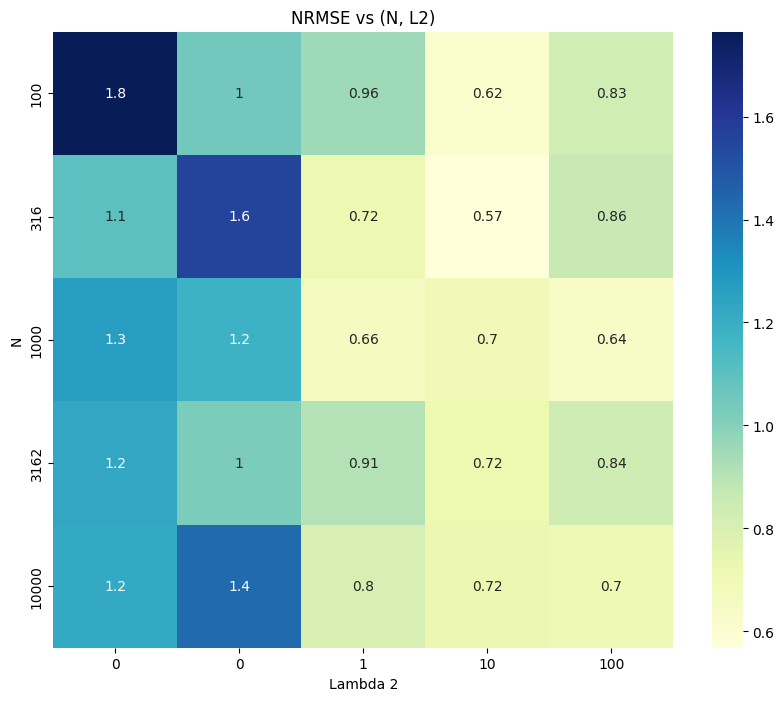

In [27]:
# [18] copied directly from question 10
w_10 = np.random.randn(11) # target weights

# [19] N values ranging from 10 to 100000
N_values = np.logspace(2, 4, num=5, dtype=int)

# lambda_2 values ranging from 1e-3 to 10
lambda2_values = np.logspace(-2, 2, num=5, dtype=int)

NRMSE_values = []

# we loop over each N first and the inside we loop over the lambda
for N in N_values:
    nrmse_N = []  # Initialize list to store NRMSE for current N
    # Loop over each value of lambda_2
    for lambda_2 in lambda2_values:

        # generating data matrix
        X_10 = generate_data(N, np.identity(10))

        # we generate the target using true weights, we will keep the variance fixed at 0.5
        Y_10 = generate_binary_class(X_10, w_10, variance=0.5)

        # [16] Split the data into training (80%) and testing (20%) sets
        split_index = int(0.8 * N)
        train_X = X_10[:split_index]
        train_y = Y_10[:split_index]
        test_X = X_10[split_index:]
        test_y = Y_10[split_index:]

        nrmse_gd = 0  # this sums the nrmse values in the inner loop, gets appended to nrmse_N as the average of 5 runs

        # now we perform descent
        for i in range(5):
            # our random weights are generated, there is no particular reason to choose a gaussian distribution but we are sure that the columns are independent this way
            w_0 = np.random.randn(11)

            # call the descent function,
            w_gd = grad_descent_logistic(train_y, train_X, w_0, 0, lambda_2, 1000, 0.001)

            # now we just compute the Y matrix from the weights we got from gradient descent
            bias = w_gd[-1]
            Y = np.dot(test_X, w_gd[:-1]) + bias
            Y = sigmoid(Y)

            # run NRMSE on it and add it to our inner sum
            nrmse_gd += NRMSE(test_y, Y)

        # average and append
        nrmse_gd = nrmse_gd / 5
        print(N, lambda_2, nrmse_gd) # to see our progres
        nrmse_N.append(nrmse_gd)

    # Append the NRMSE values for this N to the overall results
    NRMSE_values.append(nrmse_N)

# Convert the NRMSE values to a numpy array for easier handling
NRMSE_values = np.array(NRMSE_values)

# [16] Plotting the heatmap to visualize the results
plt.figure(figsize=(10, 8))
sns.heatmap(NRMSE_values, annot=True, xticklabels=lambda2_values, yticklabels=N_values, cmap="YlGnBu")

# [16] Label the axes and the plot
plt.xlabel("Lambda 2")
plt.ylabel("N")
plt.title("NRMSE vs (N, L2)")
plt.show()

Conclusions:
- A decrease in NRMSE is seen as N increases while a increase is seen with lambda 2. This is different from linear regression.

References:

- [1] https://stackoverflow.com/questions/47240308/differences-between-numpy-random-rand-vs-numpy-random-randn-in-python
- [2] https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html#numpy.random.randn
- [3] GPT: how can i just multiply matrices in python, i want multiply a nxm matrix to a mxd matrix to get a nxd matrix
- [4] GPT: what does it mean by sans one element? and how is the bias the excluded element, what does that mean here?
- [5] https://numpy.org/doc/stable/reference/generated/numpy.identity.html#numpy.identity
- [6] https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html
- [7] https://www.geeksforgeeks.org/how-to-plot-logarithmic-axes-in-matplotlib/
- [8] https://www.geeksforgeeks.org/python-exception-handling/
- [9] https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html
- [10] https://www.statisticshowto.com/nrmse/
- [11] https://www.geeksforgeeks.org/mean-squared-error/
- [12] https://www.youtube.com/watch?v=KLXP2RL0-Vg&t=613s&ab_channel=JonKrohn
- [13] https://towardsdatascience.com/interpreting-weight-regularization-in-machine-learning-99f2677f7ef5
- [14] GPT: i used very less lambda1 and lambda2, even learning rate is 0.01. look at that output and fix it
- [15] https://numpy.org/doc/stable/reference/generated/numpy.vstack.html
- [16] Code + Discussion with friend, Name: Hardik Gohil Roll No: 22b1293
- [17] https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
- [18] GPT: tell me the approach for the problem as well as write python code for logspace generation of N and lambda2, also write the matplotlib code for plotting
- [19] https://numpy.org/doc/1.20/reference/generated/numpy.logspace.html
- [20] Discussion + Help from my friend, Name: Sreekar Reddy Roll No: 22b1274
- [21] GPT: why is this a correlated matrix, as in why are its columns have correlation
- [22] GPT: write matplotlib code to plot all of this data, (question photo given, code given as context)
- [23] GPT: implement a linear binary classification vector t with variance sigma in python using only basic numpy
- [24] GPT: how do I implement the gradient of binary cross-entropy for logistic regression?